# Task 3 - Car Price Prediction With Machine Learning

### Import Libraries

In [124]:
# Data Cleaning
import pandas as pd

# Data Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model Saving
import pickle

### Read Data

In [125]:
df = pd.read_csv('./CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Wrangling

#### Check missing values

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [127]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

We can see that there are no missing values in the dataset

#### Find categorical features

In [128]:
object_columns = df.select_dtypes('object').columns
object_columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

#### Check the 'CarName' feature

In [129]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We just chenge the 'CarName' to 'CarCompany'

In [130]:
df['CarName'] = df['CarName'].apply(lambda x: x.split()[0])
df = df.rename(columns={'CarName':"CarCompany"})

df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some misspelled company name and duplicates

* alfa-romero -> alfa-romeo
* maxda -> mazda
* Nissan -> nissan
* porcshce -> porsche
* toyouta -> toyota
* vokswagen -> volkswagen
* vw -> volkswagen

In [131]:
df['CarCompany'] = df['CarCompany'].str.lower()

replace = {
    'alfa-romero':'alfa-romeo',
    'maxda':'mazda',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
}

df['CarCompany'].replace(to_replace=replace, inplace=True)

df['CarCompany'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Check 'fueltype' feature

In [132]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

#### Check 'aspiration' feature

In [133]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

#### Check 'doornumber' feature

In [134]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

#### Check 'carbody' feature

In [135]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

#### Check 'drivewheel' feature

In [136]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

####  Check 'enginelocation' feature

In [137]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

#### Check 'enginetype' feature

In [138]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

#### Check 'cylindernumber' feature

In [139]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

#### Check 'fuelsystem' feature

In [140]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

#### Check numeric features

In [141]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Visualization

#### Check distribution of car price

<AxesSubplot: ylabel='price'>

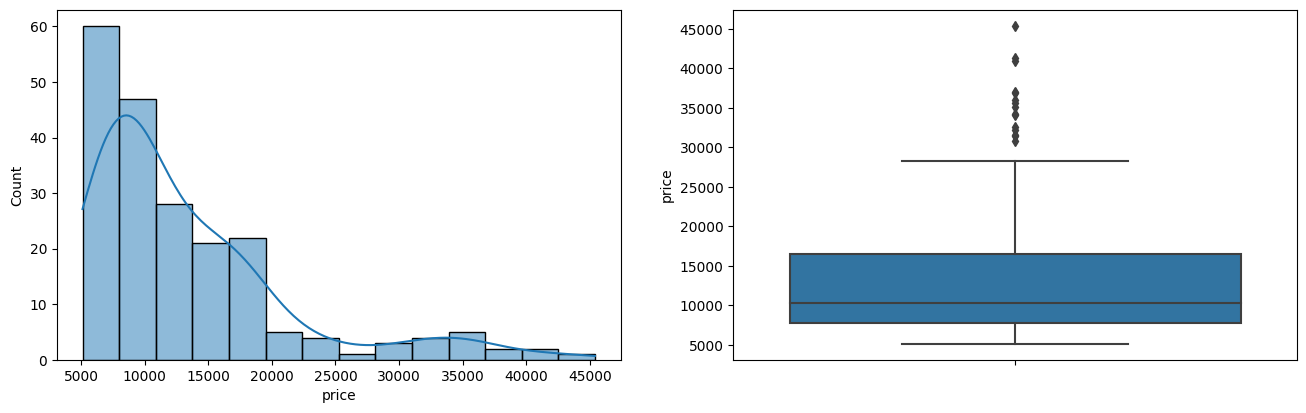

In [142]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='price', kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='price')


In [143]:
df['price'].describe(percentiles = [0.25, 0.50, 0.7, 0.75, 0.8, 0.85, 0.90, 1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
70%      15458.000000
75%      16503.000000
80%      17493.800000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

1. Most of the car prices (about 70%) are less than $15,000
2. There are high variance in the prices (85% of the prices are below 18,500, while the remaining 15% are between 18,500 and 45,400.)
3. There are some outliers, but consider to the size of dataset, we may not to remove it

#### Check numeric data

##### Price pair plot function

In [144]:
def price_pair_plot(*target):
    plt.figure(figsize=(16, 10))
    sns.pairplot(data=df, x_vars=target, y_vars='price')
    plt.show()

    for feature in target:
        print(f"Coefficient of Correlation between Price and {feature.title()}: {df[feature].corr(df['price']):.2%}")

##### Check symboling, compressionratio and peakrpm

<Figure size 1600x1000 with 0 Axes>

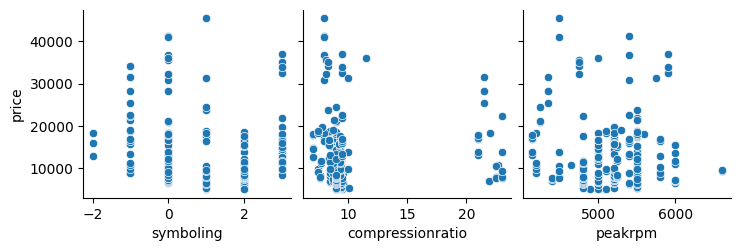

Coefficient of Correlation between Price and Symboling: -8.00%
Coefficient of Correlation between Price and Compressionratio: 6.80%
Coefficient of Correlation between Price and Peakrpm: -8.53%


In [145]:
price_pair_plot('symboling', 'compressionratio', 'peakrpm')

We can see symboling, compressionratio and peakrpm are not correlated.

##### Check carlength, carwidth and carheight

<Figure size 1600x1000 with 0 Axes>

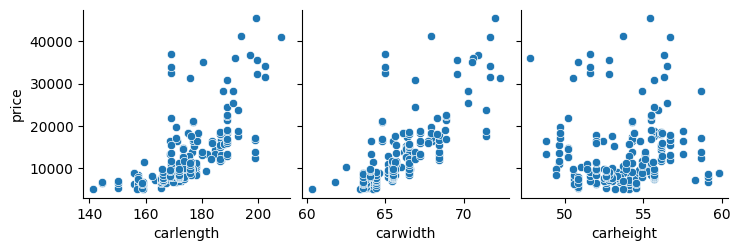

Coefficient of Correlation between Price and Carlength: 68.29%
Coefficient of Correlation between Price and Carwidth: 75.93%
Coefficient of Correlation between Price and Carheight: 11.93%


In [146]:
price_pair_plot('carlength', 'carwidth', 'carheight')

We can see carlength and carwidth are more correlated than carheight

##### Check enginesize, horsepower and stroke

<Figure size 1600x1000 with 0 Axes>

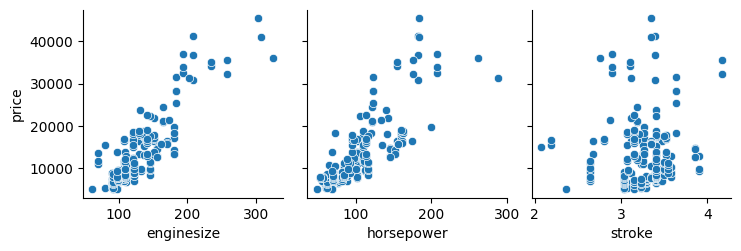

Coefficient of Correlation between Price and Enginesize: 87.41%
Coefficient of Correlation between Price and Horsepower: 80.81%
Coefficient of Correlation between Price and Stroke: 7.94%


In [147]:
price_pair_plot('enginesize', 'horsepower', 'stroke')

We can see enginesize and horsepower are highly correlated, but stroke is not correlated

##### Check wheelbase, curbweight and boreratio

<Figure size 1600x1000 with 0 Axes>

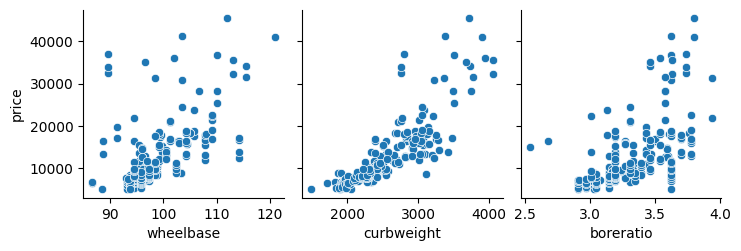

Coefficient of Correlation between Price and Wheelbase: 57.78%
Coefficient of Correlation between Price and Curbweight: 83.53%
Coefficient of Correlation between Price and Boreratio: 55.32%


In [148]:
price_pair_plot('wheelbase', 'curbweight', 'boreratio')

We can see these three features are all positively correlated

##### Check citympg and highwaympg

<Figure size 1600x1000 with 0 Axes>

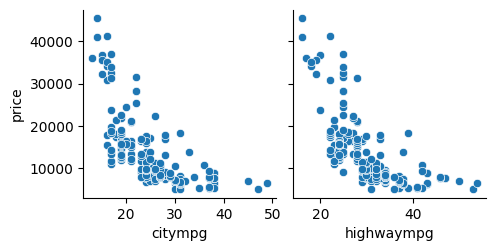

Coefficient of Correlation between Price and Citympg: -68.58%
Coefficient of Correlation between Price and Highwaympg: -69.76%


In [149]:
price_pair_plot('citympg', 'highwaympg')

Both the features are negatively correlated

##### Feature selection

positively correlated:
* carlength
* carwidth
* enginesize
* horsepower
* wheelbase
* curbweight
* boreratio

negatively correlated:
* citympg
* highwaympg

We will keep these features

##### Heap map plot

In [150]:
def heat_map_plot(features):
    sns.heatmap(data=df.filter(features).corr(), annot=True)

##### Check multicollinearity between the correlated independent variables above and Price 

In [151]:
selected_features = ['carlength', 'carwidth', 'enginesize', 
                     'horsepower', 'wheelbase', 'curbweight', 
                     'boreratio', 'citympg', 'highwaympg']

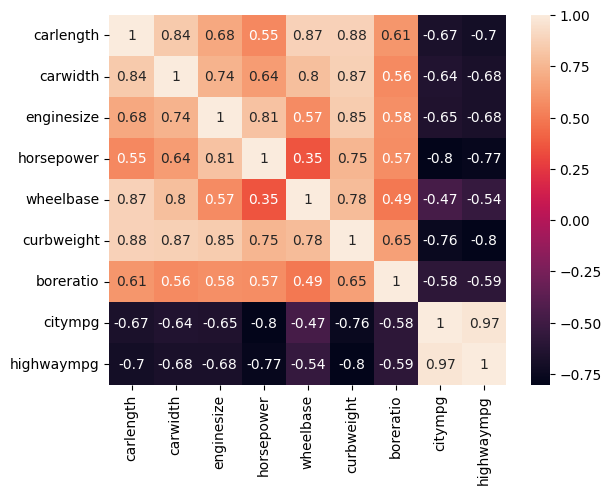

In [152]:
heat_map_plot(selected_features)

##### Examination of the correlation between carlength, carwidth, wheelbase and curbweight

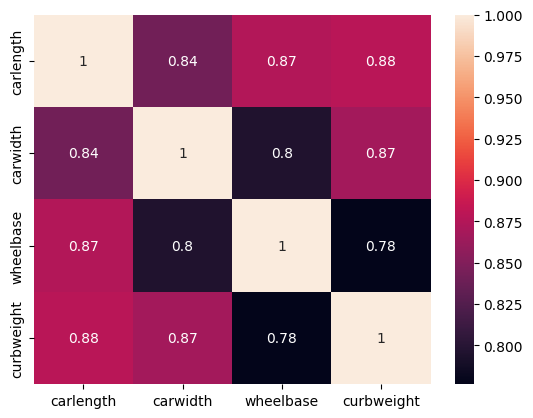

In [153]:
heat_map_plot(['carlength', 'carwidth', 'wheelbase', 'curbweight'])

Wheelbase, carlength, carwidth and curbweight are very correlated and we will keep only one of them.

##### Examination of the correlation between enginesize and horsepower

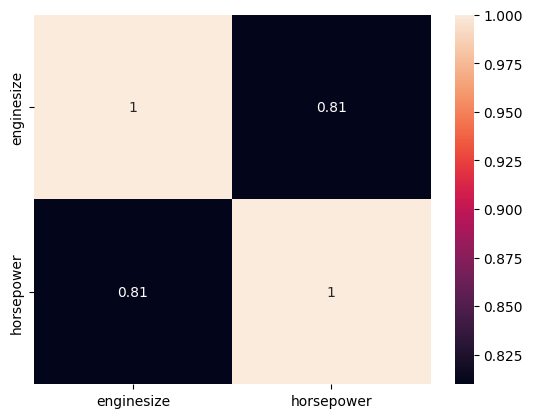

In [154]:
heat_map_plot(['enginesize', 'horsepower'])

Enginesize and horsepower are highly correlated and we will keep only one of them.

##### Examination of the correlation between citympg and highwaympg

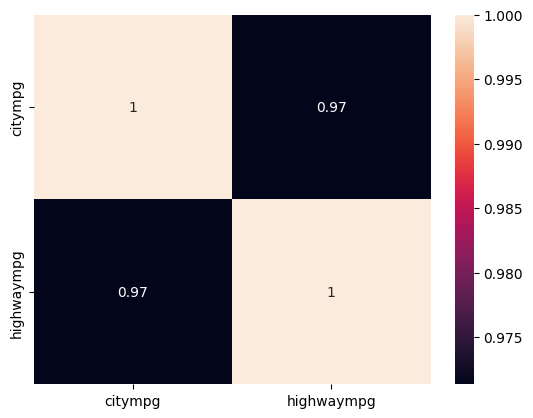

In [155]:
heat_map_plot(['citympg', 'highwaympg'])

Citympg and highwaympg are highly correlated and we will keep only one of them.

#### Check categorical data

##### Check CarCompany

<AxesSubplot: xlabel='count', ylabel='CarCompany'>

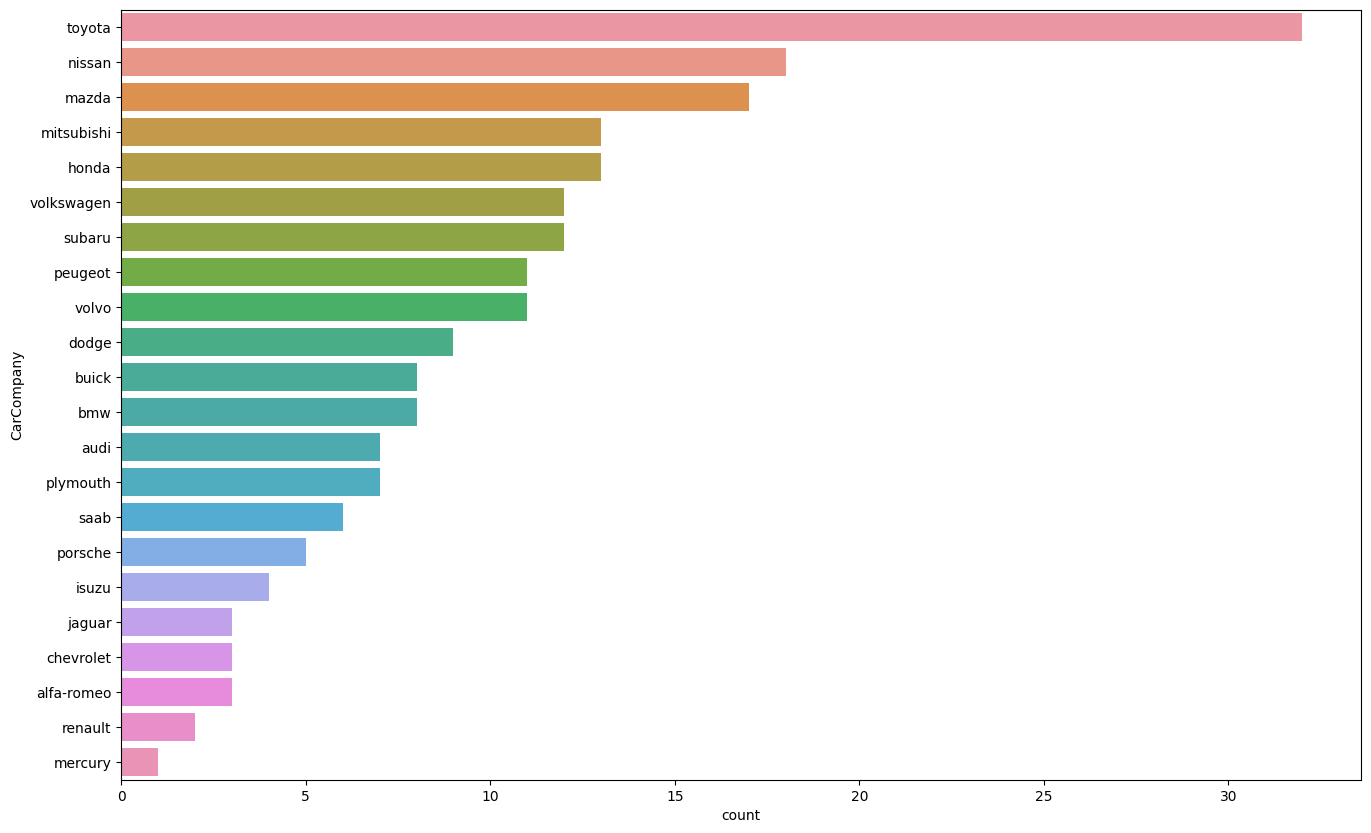

In [156]:
plt.figure(figsize=(16, 10))
sns.countplot(data=df, y='CarCompany', order=df['CarCompany'].value_counts().index)

Toyota seems to be the most chose company

##### Price relation plot function

In [157]:
def price_relation_plot(target):
    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x=target, order=df[target].value_counts().index)

    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x=target, y='price')

##### Check fueltype

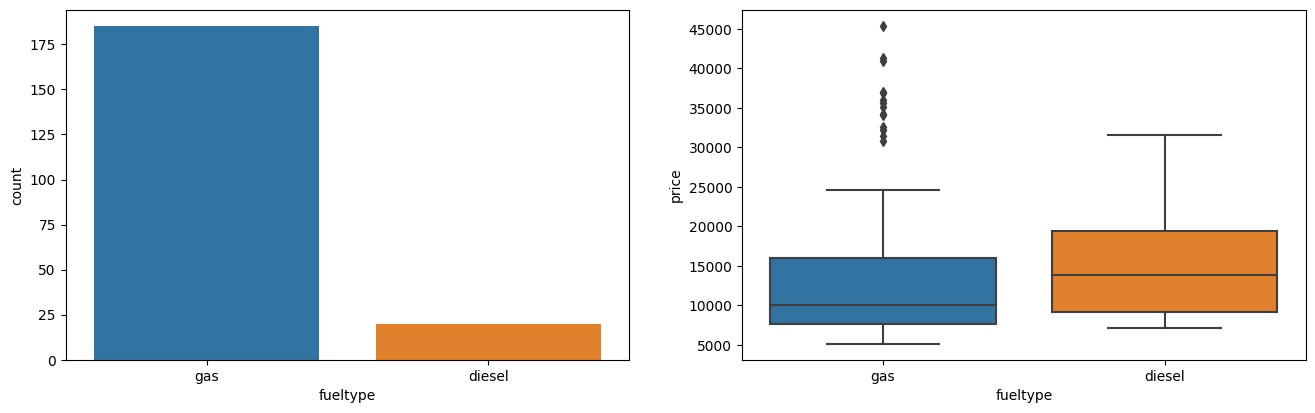

In [158]:
price_relation_plot('fueltype')

1. We can see most of the cars use gas as fuel
2. The average price of diesel cars is higher than gas cars
3. There are outliers exist in gas cars

##### Check aspiration

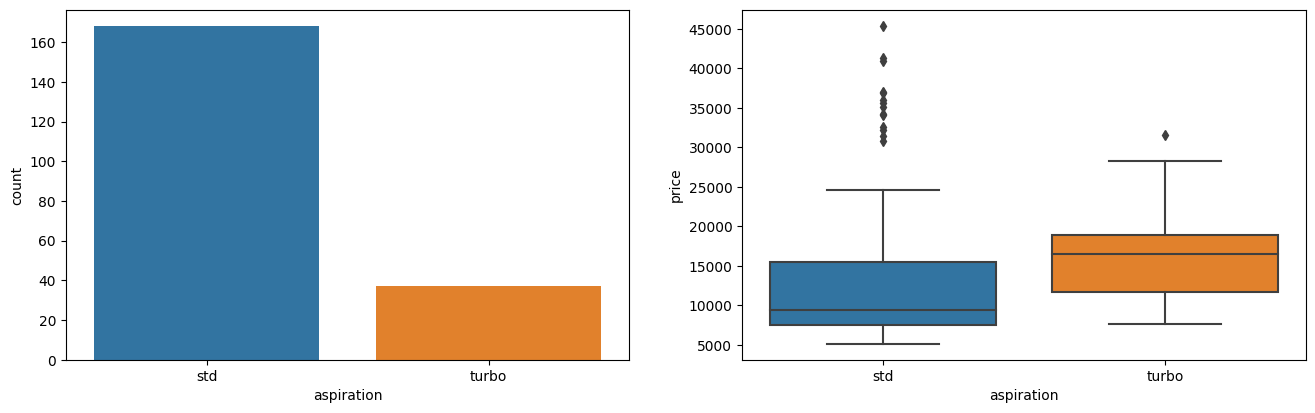

In [159]:
price_relation_plot('aspiration')

1. The average price of cars with turbo aspiration is higher than standard aspiration
2. There are outliers exist in both type of cars

##### Check doornumber

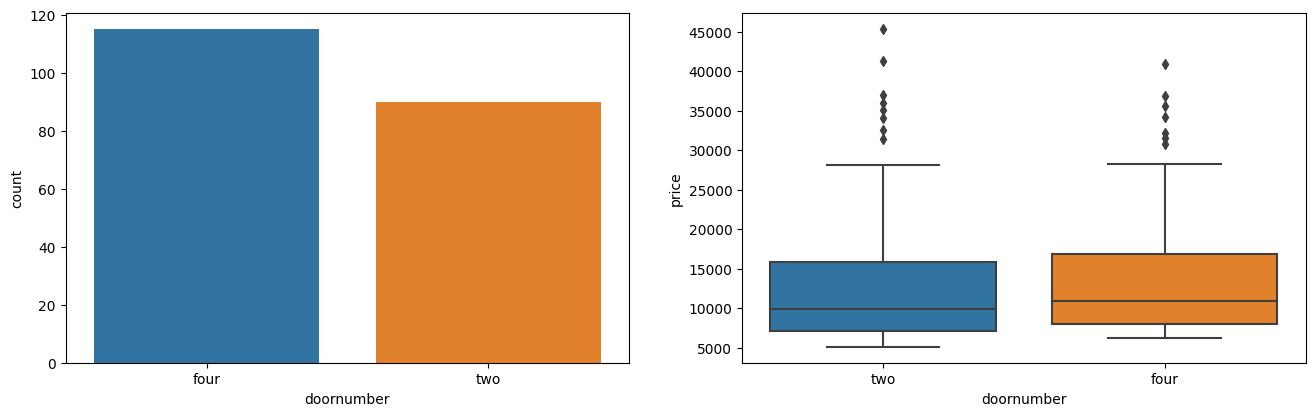

In [160]:
price_relation_plot('doornumber')

1. Doornumber values have few difference, which means the price is not affected by doornumber
2. There are outpilers exist in both type of cars

##### Check carbody

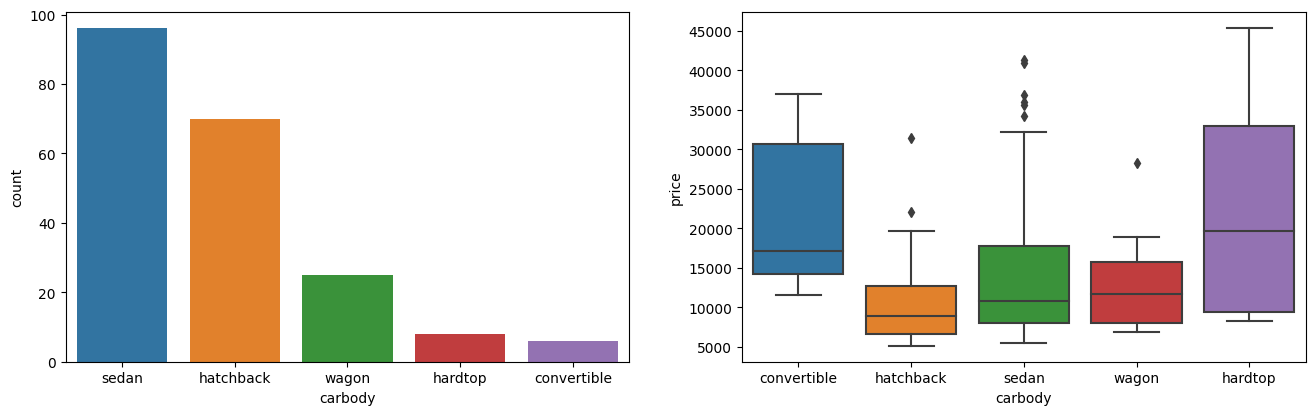

In [161]:
price_relation_plot('carbody')

1. Most of the cars are sedan and hatchback
2. hardtop has highest average price
3. There are outliers exist in several types

##### Check drivewheel

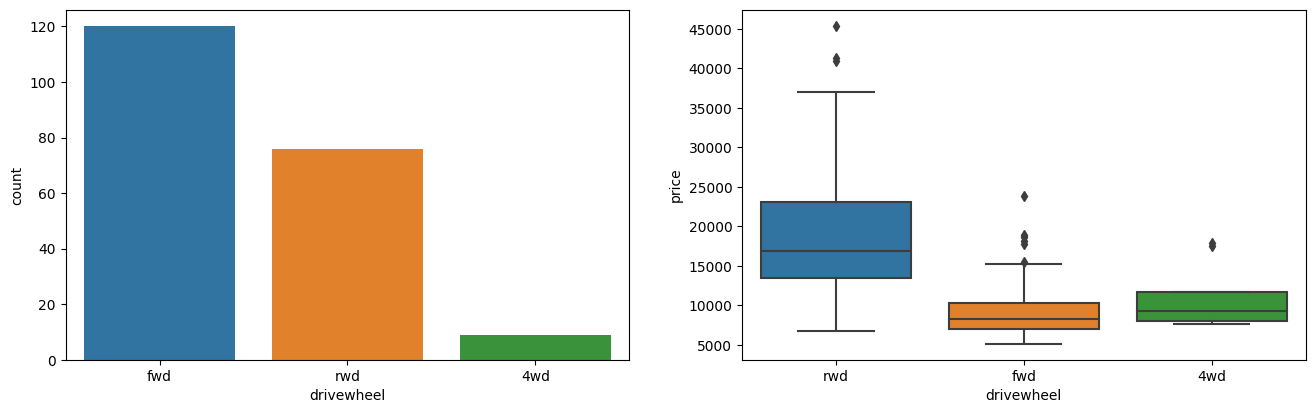

In [162]:
price_relation_plot('drivewheel')

1. FWD is the most favored, and the second place is RWD followed by 4WD
2. Though RWD has higher average price, people like it more than 4WD
3. There are some outliers exist.

##### Check enginelocation

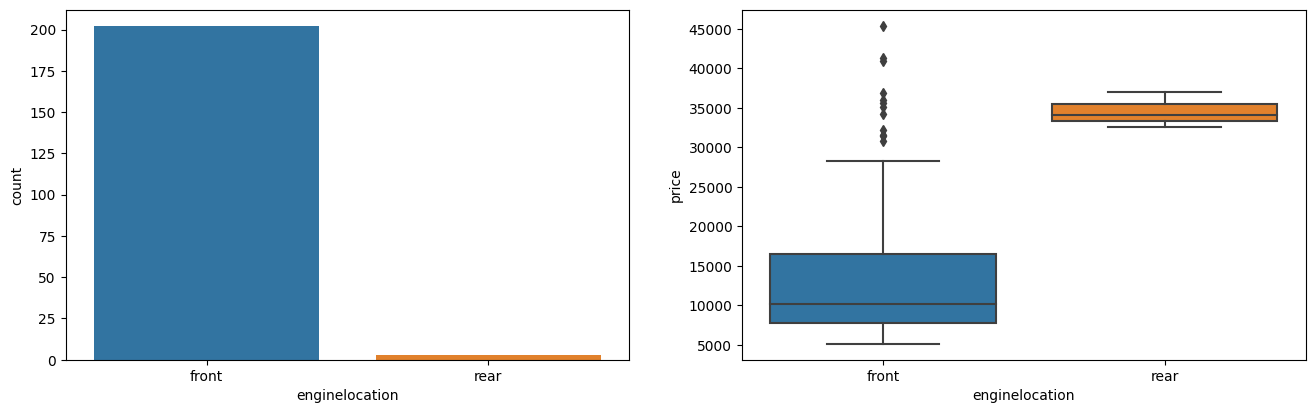

In [163]:
price_relation_plot('enginelocation')

1. Rear engine location is very expensive
2. Most of the cars' engine location are front
3. There are outliers exist in front

##### Check enginetype

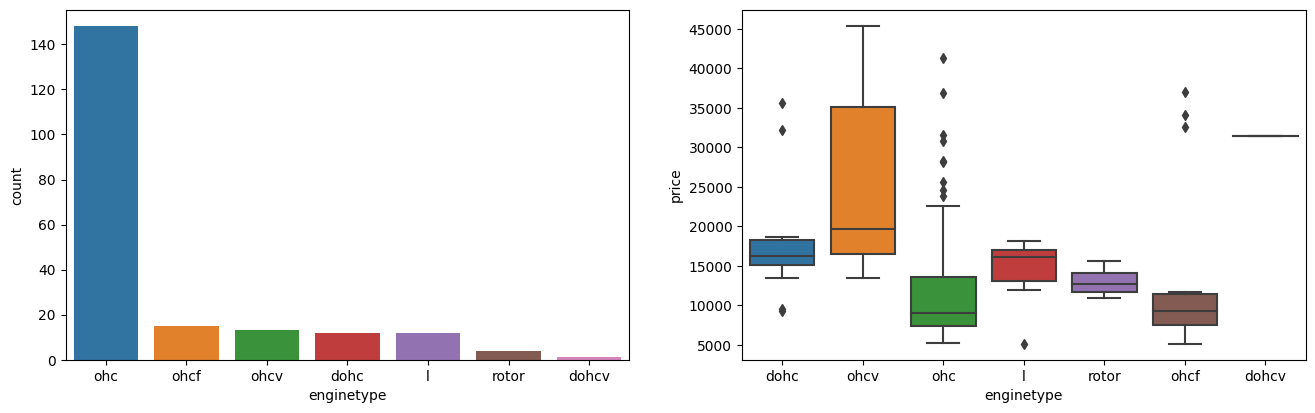

In [164]:
price_relation_plot('enginetype')

1. OHC is the most favored engine type, which also has the lowest average price
2. OHCV has the highest average price
3. There are some outliers exist

##### Check cylindernumber

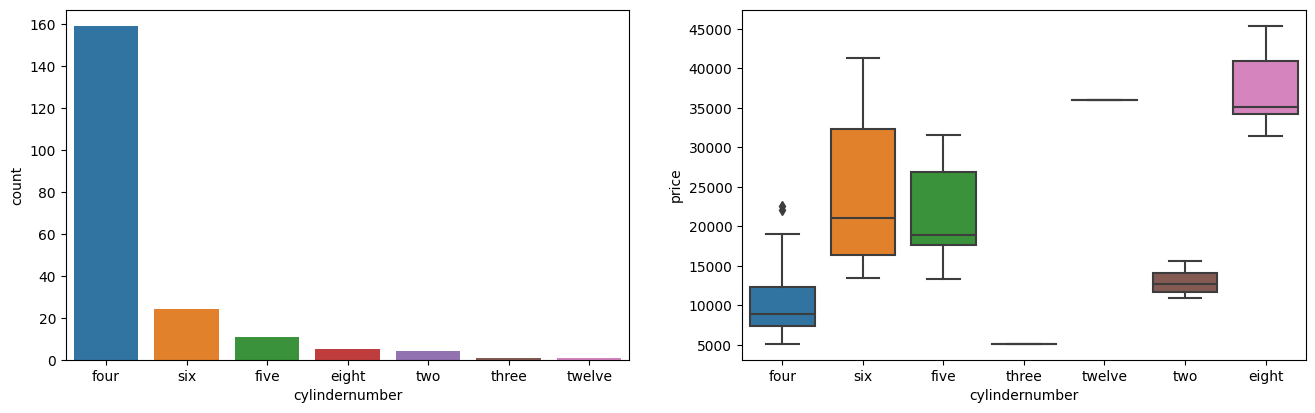

In [165]:
price_relation_plot('cylindernumber')

1. Most of the cars are four-cylinder
2. eight-cylinder has the highest price while four-cylinder has the lowest without considering three-cylinder
3. There are outliers exist in four-cylinder

##### Check fuelsystem

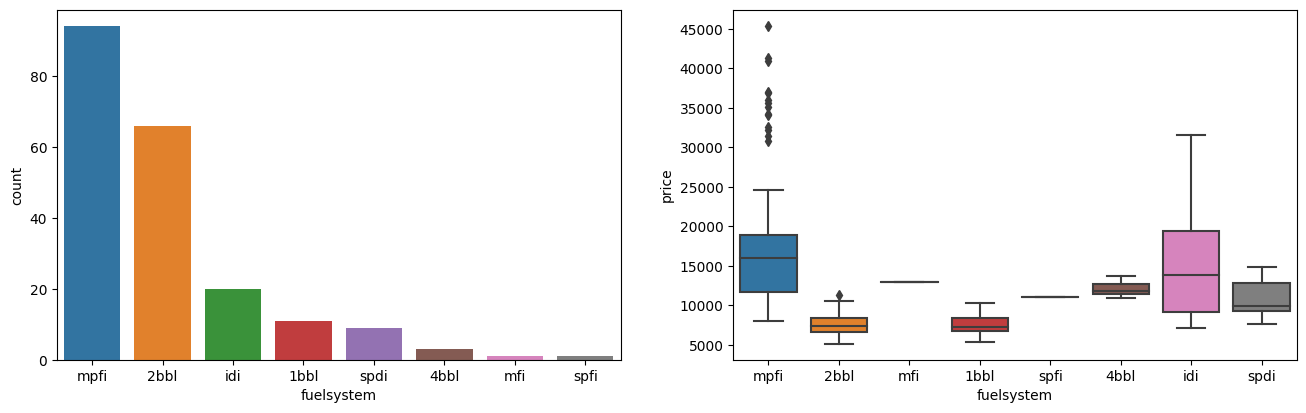

In [166]:
price_relation_plot('fuelsystem')

1. MPFI is the favored type of fuel system though it has the highest average price
2. There are outliers exist in MPFI and 2BBL

### Data Preparation

#### Remove the uncorrelated variables with Price, and choose only one variable among the variables correlated with it

In [167]:
df.drop(['symboling', 'car_ID', 'carheight' ,'stroke' ,'compressionratio' ,'peakrpm' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'highwaympg'], axis='columns', inplace=True)
df.head()

,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price
0,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,13495.0
1,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,16500.0
2,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,154,19,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,102,24,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,115,18,17450.0


#### Dummy variables creation

In [168]:
def get_dummy(feature, df):
    dummies = pd.get_dummies(df[feature], prefix=feature, drop_first=True)
    df = pd.concat([df, dummies], axis='columns')
    df.drop(feature, axis='columns', inplace=True)
    return df

In [169]:
features = df.select_dtypes('object').columns
features

Index(['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [170]:
for feature in features:
    df = get_dummy(feature, df)

df.head()

,wheelbase,boreratio,horsepower,citympg,price,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,3.47,111,21,13495.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,3.47,111,21,16500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,2.68,154,19,16500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,3.19,102,24,13950.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,3.19,115,18,17450.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Feature scaling

In [171]:
scaler = StandardScaler() 

col_to_scale = ['wheelbase', 'boreratio', 'horsepower', 'citympg']
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

df.head()

,wheelbase,boreratio,horsepower,citympg,price,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,0.519071,0.174483,-0.646553,13495.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,0.519071,0.174483,-0.646553,16500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-2.404880,1.264536,-0.953012,16500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.173698,-0.517266,-0.053668,-0.186865,13950.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,-0.517266,0.275883,-1.106241,17450.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Modeling

#### Find best model for modeling

In [172]:
X = df.drop('price', axis='columns')
y = df['price']

In [173]:
data = {
    'linear_regression':{
        'model': LinearRegression(),
        'params':{}
    },
    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            "n_estimators": range(10, 200, 10),
            "criterion":['squared_error', 'absolute_error', 'friedman_mse']
        }
    },
    'decision_tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
            'max_features':['sqrt', 'log2'],
        }
    }
}

In [174]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for model_name, mp in data.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

result = pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [175]:
result.head()

,model,best_score,best_params
0,linear_regression,0.873656,{}
1,random_forest,0.896189,"{'criterion': 'absolute_error', 'n_estimators'..."
2,decision_tree,0.820163,"{'criterion': 'absolute_error', 'max_features'..."


From the table above we can see that RandomForest give us the best result

#### Build the model

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [177]:
model = RandomForestRegressor(criterion='absolute_error')
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8727436543456245

### Model Evaluation

<AxesSubplot: xlabel='price'>

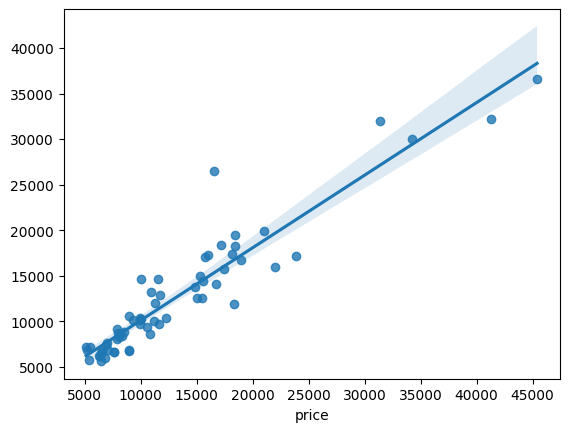

In [178]:
y_pred = model.predict(X_test)
sns.regplot(x=y_test, y=y_pred)

There are some outliers we didn't remove, or the model will be better

### Save the model

In [179]:
with open('CarPrice_model', 'wb') as f:
    pickle.dump(model, f)